## Title of Project : ABC Tech ITSM Project for priority tickets classification

## Problem Statement
ABC Tech is an mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained 
matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.
ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.Total of about 46k records from year 2012,2013,2014
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so 
that they can take preventive measures or fix the problem before 
it surfaces.
2. Forecast the incident volume in different fields , quarterly and 
annual. So that they can be better prepared with resources and 
technology planning.
3. Auto tag the tickets with right priorities and right departments so 
that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / 
misconfiguration of ITSM assets

## About Dataset

This project belongs to ABC technologies, where the company wanted to include the ML algorithms for the automatic prediction of priority tickets. Data needs to be queried from MYSQL data base (Read Only Access)

## Workflow of the project:
1. Reading the data from server 
2. Saving the data into a local drive 
3. Analysing the data & Exploratory Data Analysis 
4. Data Cleaning and Data mugging 
5. Modeling

The project is done with the purpose of:

Finding out factors which affects priority and training a model which accurately predicts it so that preventive measures can be taken for High Priority Tickets and reassigning can be reduced.
Finding out factors which affect RFC and predicting it.
Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.

The analysis is done in three parts:
1. Predicting Priorities
2. Predicting Request for Change (RFC)
3. Forecasting the Incident Volume

# Business Case-1
### Predicting High Priority Tickets

In [78]:
#importing requires libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import warnings
warnings.filterwarnings('ignore')

In [79]:
## making connections to database server
connection= mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!')

In [80]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [81]:
## connecting the database  (configure to initiate the connection to mysql)
connection=mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!',
                                   database='project_itsm')

In [82]:
# view tables present in datamites_sql db
db_tables=pd.read_sql('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [83]:
# retriving dataset_list table
query="select * from dataset_list"
data=pd.read_sql(query,connection)
print(data.shape)
data

(46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [84]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [85]:
data.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,incident,KM0000182,closed,0,31-03-2014 17:24,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [87]:
data.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [88]:
# Incident_ID,number_cnt are unique features

In [89]:
pd.set_option('display.max_columns',None)

In [90]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [91]:
data.shape

(46606, 25)

### EDA (Exploratory data analysis)

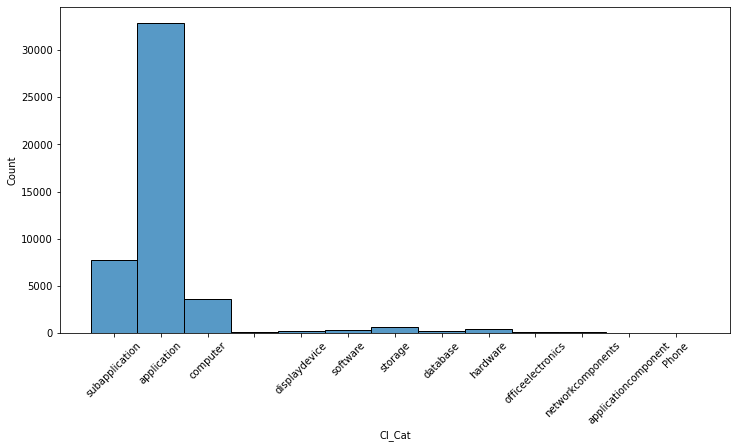

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(data.CI_Cat)
plt.xticks(rotation=45)
plt.show()

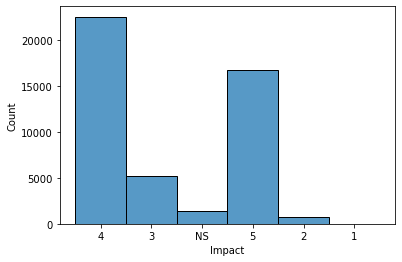

In [47]:
sns.histplot(data.Impact)
plt.show()

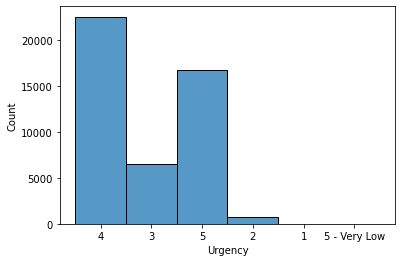

In [49]:
sns.histplot(data.Urgency)
plt.show()

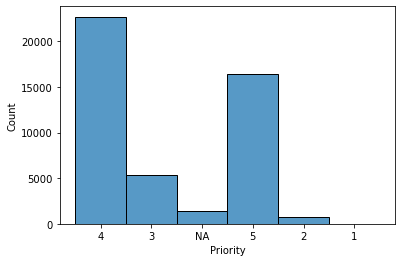

In [51]:
sns.histplot(data.Priority)
plt.show()

<AxesSubplot:xlabel='Category', ylabel='Count'>

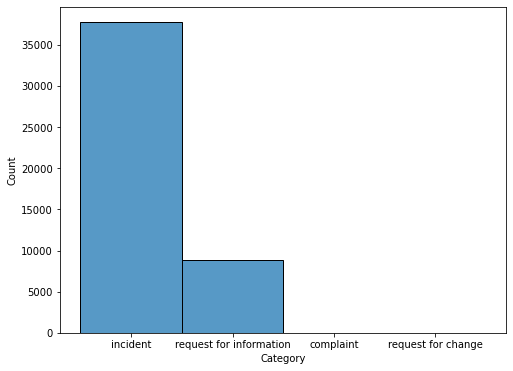

In [61]:
plt.figure(figsize=(8,6))
sns.histplot(data.Category)

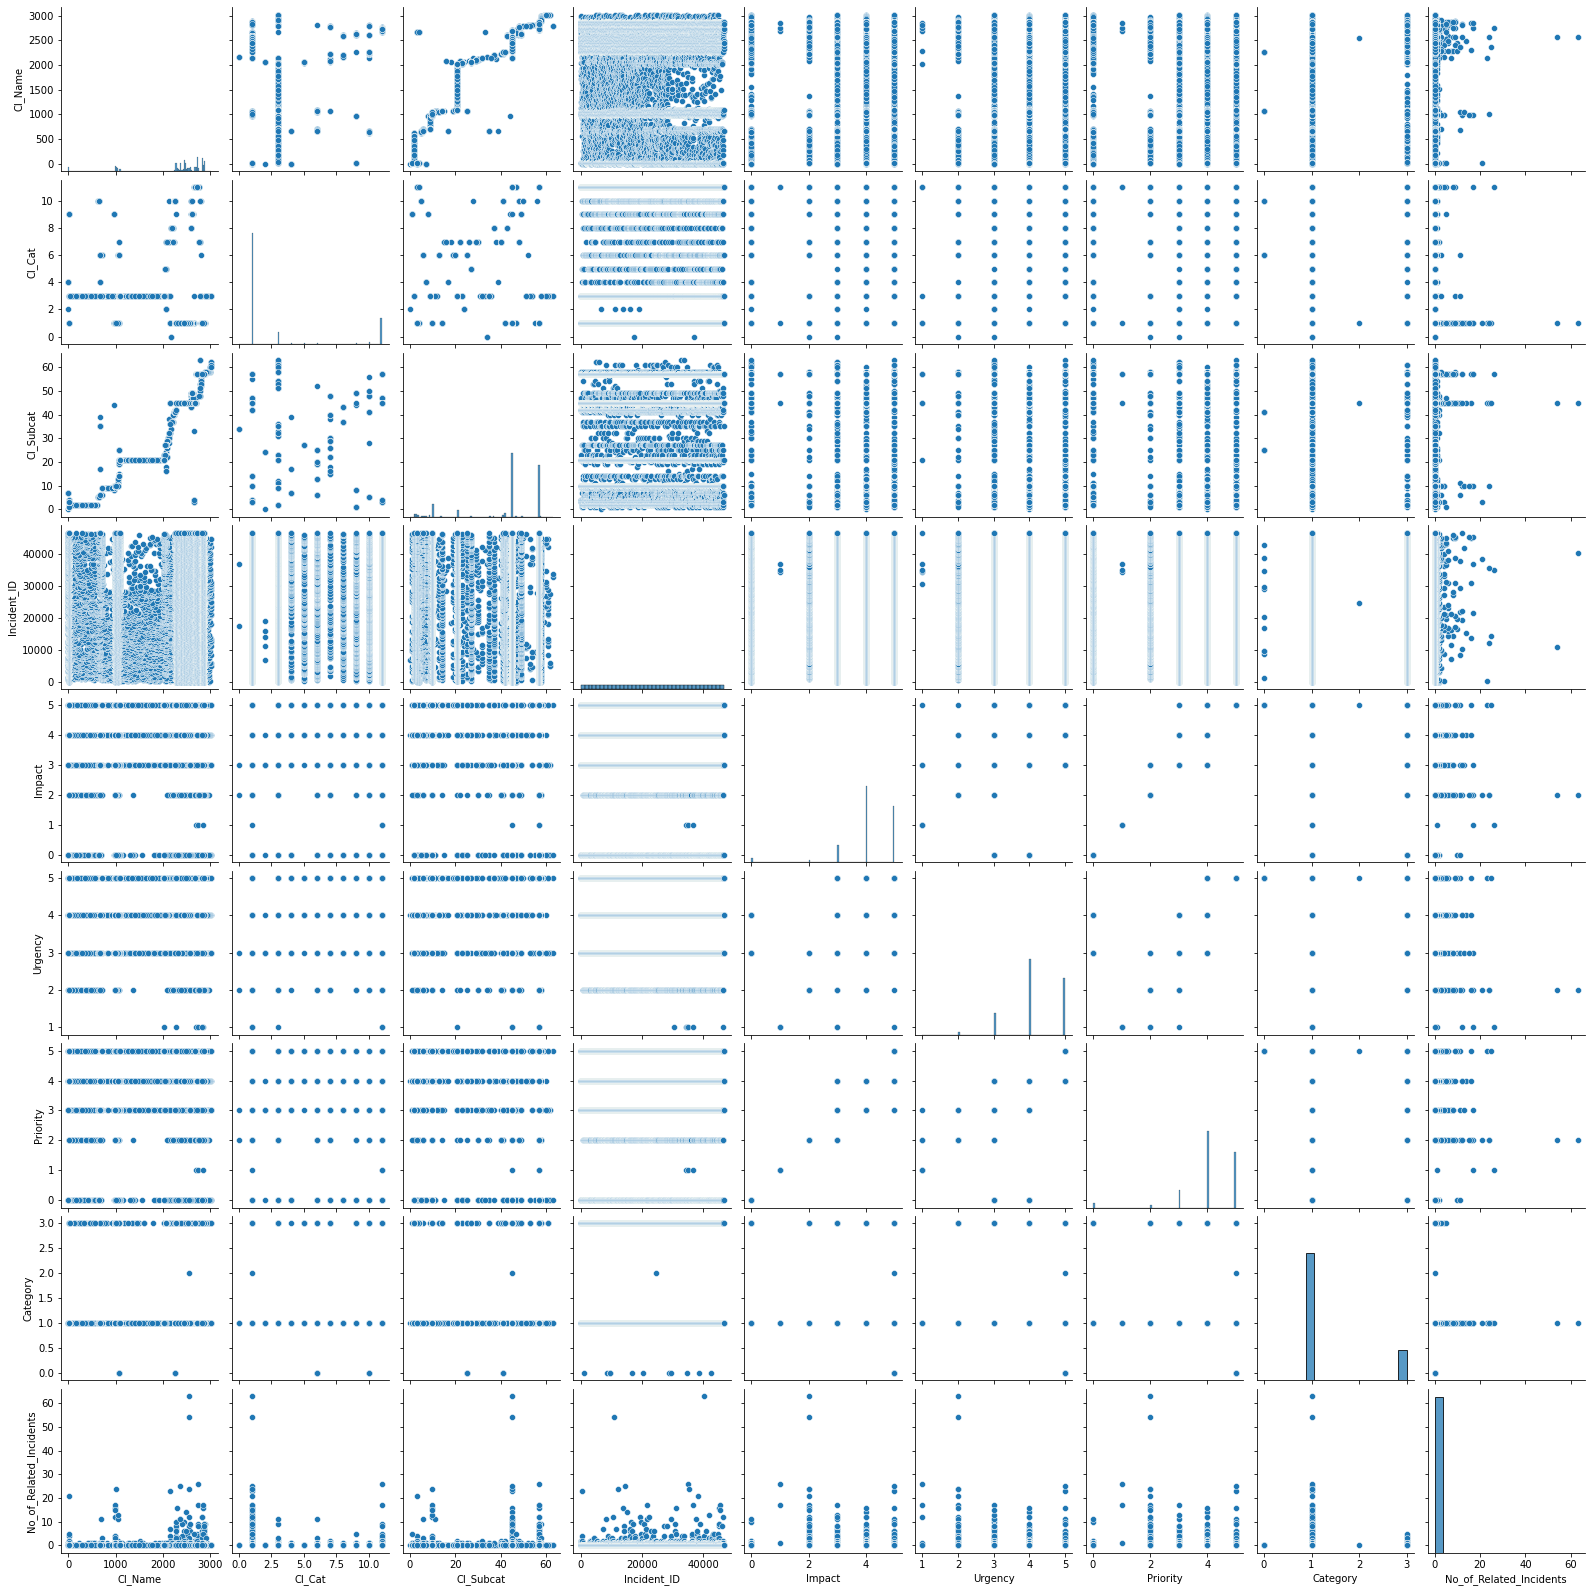

In [211]:
sns.pairplot(data)

# Data Preprocessing

In [92]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [93]:
data.drop(labels=['Status','number_cnt','number_cnt','KB_number','Alert_Status','No_of_Reassignments',
         'Reopen_Time','Resolved_Time','Close_Time','Handle_Time_hrs','Closure_Code',
         'Related_Interaction','Related_Change'],axis=1,inplace=True)
#droping unwanted features which do not contribute in predicting target feature

In [94]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,4,4,4,incident,05-02-2012 13:32,1,2,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,3,3,3,incident,12-03-2012 15:44,1,1,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,NS,3,NA,request for information,29-03-2012 12:36,1,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,4,4,4,incident,17-07-2012 11:49,1,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,4,4,4,incident,10-08-2012 11:01,1,,


In [95]:
#Dealing Missing values
data.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Impact                        0
Urgency                       0
Priority                      0
Category                      0
Open_Time                     0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
dtype: int64

In [96]:
data.CI_Cat.value_counts() 

application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [97]:
data.replace('',np.nan,inplace=True)
data.replace('NS',np.nan,inplace=True)
data.replace('NA',np.nan,inplace=True)

In [98]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Impact                         1380
Urgency                           0
Priority                       1380
Category                          0
Open_Time                         0
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [99]:
# percentage of missing values
missing_count=(data.isnull().sum()/len(data))*100
missing_count.sort_values()

CI_Name                        0.000000
WBS                            0.000000
Incident_ID                    0.000000
Urgency                        0.000000
Category                       0.000000
Open_Time                      0.000000
CI_Cat                         0.238167
CI_Subcat                      0.238167
No_of_Related_Interactions     0.244604
Impact                         2.960992
Priority                       2.960992
No_of_Related_Incidents       97.378020
No_of_Related_Changes         98.798438
dtype: float64

In [100]:
import scipy
from scipy import stats
print(stats.mode(data.CI_Cat))
print(stats.mode(data.CI_Subcat))
print(stats.mode(data.No_of_Related_Interactions))

ModeResult(mode=array(['application'], dtype=object), count=array([32900]))
ModeResult(mode=array(['Server Based Application'], dtype=object), count=array([18811]))
ModeResult(mode=array(['1'], dtype=object), count=array([43058]))


In [101]:
data.loc[data.CI_Cat.isnull()==True,'CI_Cat']='application'
data.loc[data.CI_Subcat.isnull()==True,'CI_Subcat']='Server Based Application'
data.loc[data.Impact.isnull()==True,'Impact']=0
data.loc[data.Priority.isnull()==True,'Priority']=0
data.loc[data.No_of_Related_Incidents.isnull()==True,'No_of_Related_Incidents']=0
data.loc[data.No_of_Related_Changes.isnull()==True,'No_of_Related_Changes']=1
data.loc[data.No_of_Related_Interactions.isnull()==True,'No_of_Related_Interactions']=1

In [102]:
data.isnull().sum()   #rechecking null values

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Impact                        0
Urgency                       0
Priority                      0
Category                      0
Open_Time                     0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
dtype: int64

In [103]:
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,4,4,4,incident,05-02-2012 13:32,1,2,1
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,3,3,3,incident,12-03-2012 15:44,1,1,1
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,0,3,0,request for information,29-03-2012 12:36,1,0,1
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,4,4,4,incident,17-07-2012 11:49,1,0,1
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,4,4,4,incident,10-08-2012 11:01,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,4,4,4,incident,31-03-2014 16:23,1,0,1
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,4,4,4,incident,31-03-2014 15:03,1,0,1
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,5,5,5,incident,31-03-2014 15:28,1,0,1
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,4,4,4,incident,31-03-2014 15:35,1,0,1


In [104]:
data.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Impact                        object
Urgency                       object
Priority                      object
Category                      object
Open_Time                     object
No_of_Related_Interactions    object
No_of_Related_Incidents       object
No_of_Related_Changes         object
dtype: object

In [105]:
data.Urgency.replace('5 - Very Low',5,inplace=True)

In [106]:
data.Impact=data.Impact.astype('int')
data.Urgency=data.Urgency.astype('int')
data.Priority=data.Priority.astype('int')
data.No_of_Related_Incidents=data.No_of_Related_Incidents.astype('int')
data.No_of_Related_Changes=data.No_of_Related_Changes.astype('int')
data.No_of_Related_Interactions=data.No_of_Related_Interactions.astype('int')

In [107]:
data.duplicated().sum() #checking duplicate records

0

In [108]:
data.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Impact                         int32
Urgency                        int32
Priority                       int32
Category                      object
Open_Time                     object
No_of_Related_Interactions     int32
No_of_Related_Incidents        int32
No_of_Related_Changes          int32
dtype: object

In [109]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,4,4,4,incident,05-02-2012 13:32,1,2,1
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,3,3,3,incident,12-03-2012 15:44,1,1,1
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,0,3,0,request for information,29-03-2012 12:36,1,0,1
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,4,4,4,incident,17-07-2012 11:49,1,0,1
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,4,4,4,incident,10-08-2012 11:01,1,0,1


In [110]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data.CI_Name=label.fit_transform(data.CI_Name)
data.CI_Subcat=label.fit_transform(data.CI_Subcat)
data.Incident_ID=label.fit_transform(data.Incident_ID)
data.CI_Cat=label.fit_transform(data.CI_Cat)
data.Category=label.fit_transform(data.Category)
data.WBS=label.fit_transform(data.WBS)

In [111]:
data.corr()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
CI_Name,1.000000,0.168450,0.955859,-0.106713,0.019721,0.105719,0.120099,0.110714,0.072736,-0.016371,-0.000181,0.008149
CI_Cat,0.168450,1.000000,0.199085,-0.217976,0.031818,-0.017056,-0.048221,-0.015546,-0.105516,-0.012490,-0.017156,0.003699
CI_Subcat,0.955859,0.199085,1.000000,-0.124059,0.031646,0.087709,0.095688,0.093952,0.030193,-0.013018,0.000559,0.009196
WBS,-0.106713,-0.217976,-0.124059,1.000000,0.003462,0.012250,0.023112,0.009859,0.116663,-0.008254,0.026899,-0.007060
Incident_ID,0.019721,0.031818,0.031646,0.003462,1.000000,-0.023730,-0.033662,-0.023503,-0.054123,-0.016865,0.016960,-0.003545
Impact,0.105719,-0.017056,0.087709,0.012250,-0.023730,1.000000,0.856382,0.995996,0.381465,-0.014217,-0.048593,-0.005418
Urgency,0.120099,-0.048221,0.095688,0.023112,-0.033662,0.856382,1.000000,0.863380,0.470580,-0.022843,-0.064815,-0.007460
Priority,0.110714,-0.015546,0.093952,0.009859,-0.023503,0.995996,0.863380,1.000000,0.380427,-0.017526,-0.048866,-0.005302
Category,0.072736,-0.105516,0.030193,0.116663,-0.054123,0.381465,0.470580,0.380427,1.000000,-0.008890,-0.027583,-0.006441
No_of_Related_Interactions,-0.016371,-0.012490,-0.013018,-0.008254,-0.016865,-0.014217,-0.022843,-0.017526,-0.008890,1.000000,0.103612,0.008291


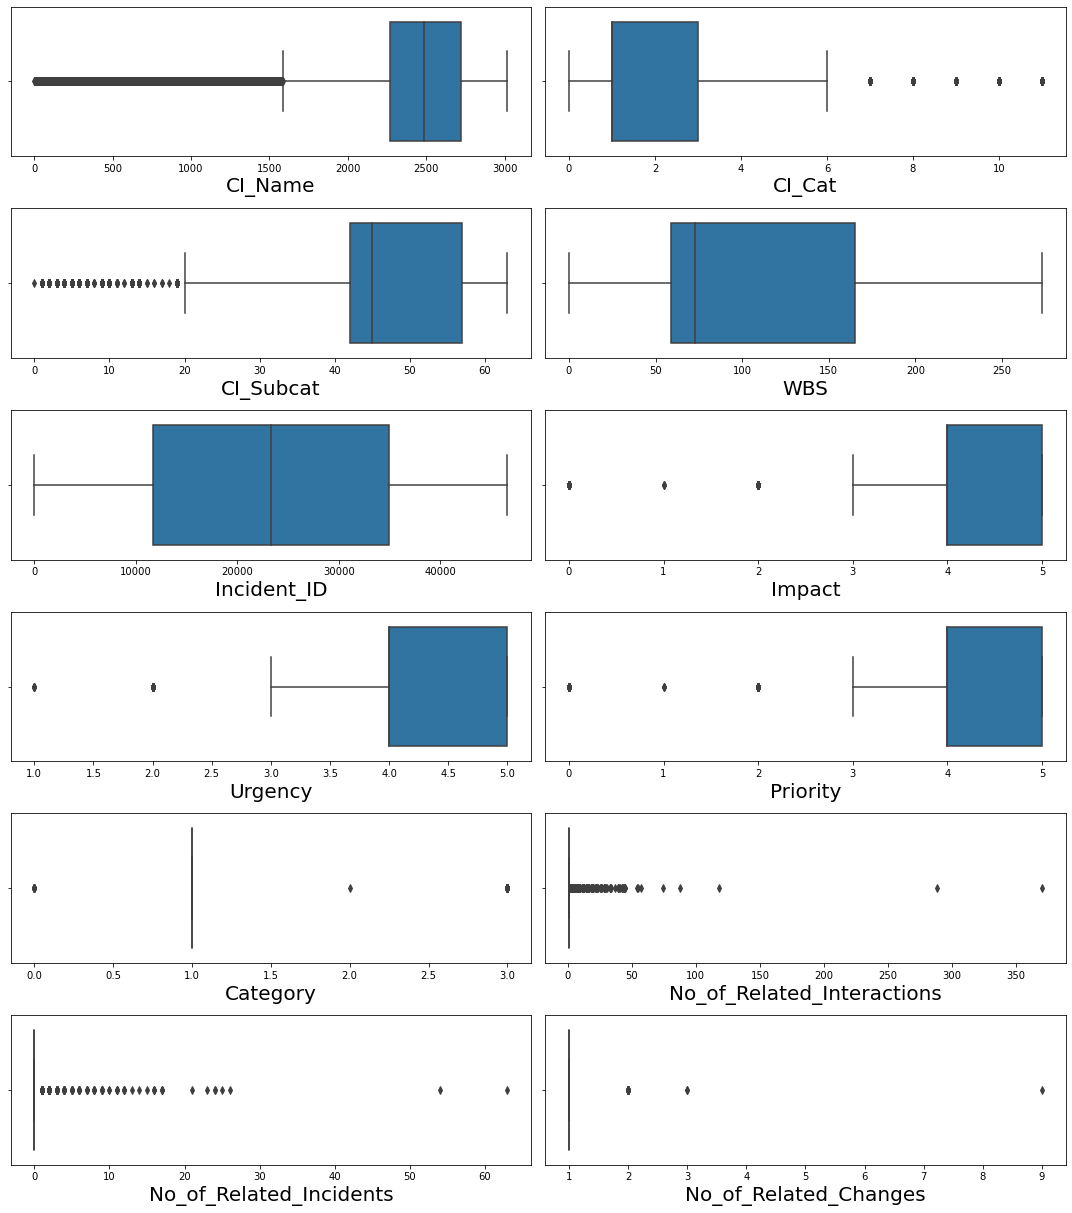

In [43]:
# Checking for outliers
# let's see how data is distributed for every column
plt.figure(figsize=(15,50), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=35 :
        ax = plt.subplot(18,2,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

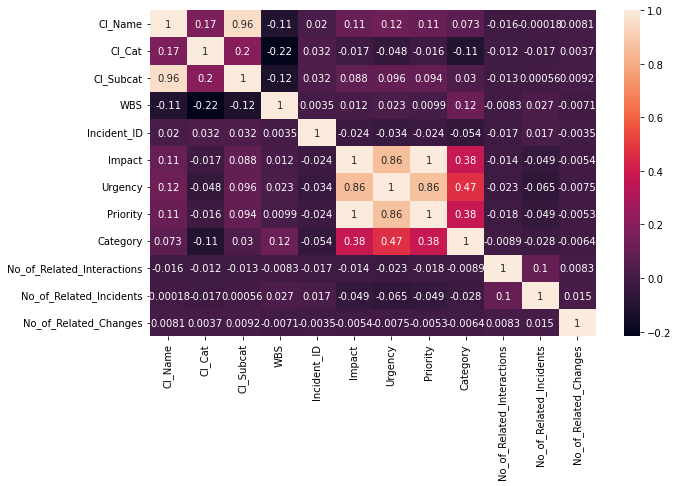

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

We can see that Imapact,Urgency,category these features are corelated with target feature i.e Priority

# Feature Selection

In [113]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,05-02-2012 13:32,1,2,1
1,2863,1,57,70,1,3,3,3,1,12-03-2012 15:44,1,1,1
2,990,1,10,74,2,0,3,0,3,29-03-2012 12:36,1,0,1
3,2863,1,57,70,3,4,4,4,1,17-07-2012 11:49,1,0,1
4,2863,1,57,70,4,4,4,4,1,10-08-2012 11:01,1,0,1


In [114]:
x=data[['CI_Name','CI_Cat','CI_Subcat','WBS','Category','Impact','Urgency','No_of_Related_Incidents']]
y=data.Priority

In [115]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [116]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

# Model Creation
### Support Vector Machine

In [117]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(x_train,y_train)

In [118]:
# Predicting the model
y_predict_svm = rbf_svc.predict(x_test)

In [119]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.9991417536833072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       0.00      0.00      0.00         1
           2       0.96      1.00      0.98       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.83      0.83      0.83     13982
weighted avg       1.00      1.00      1.00     13982



### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9997139178944358

In [121]:
y_hat=rf.predict(x_train)

In [122]:
accuracy_score(y_train,y_hat)

1.0

In [123]:
# we are getting good accuracy(80%) for training as well as testing. our model is low biased and low variance model

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0],
       [   0,    0,  225,    2,    0,    0],
       [   0,    0,    0, 1610,    1,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

### Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
multi = LogisticRegression(multi_class='multinomial', solver = 'newton-cg',max_iter=100)
multi.fit(x_train,y_train)
y_pre = multi.predict(x_test)

In [126]:
accu = accuracy_score(y_test,y_pre)
print(accu)

0.9995708768416536


In [127]:
y_p=multi.predict(x_train)

In [128]:
accuracy_score(y_train,y_p)

0.9998773908778813

### Decision Tree

In [129]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [130]:
# Predicting the model
y_predict_dtree = model_dtree.predict(x_test)

In [131]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982



In [132]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0],
       [   0,    0,  227,    0,    0,    0],
       [   0,    0,    0, 1611,    0,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

In [133]:
### XGBoost Classifier
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [134]:
# Predicting the model
y_predict_xgb = model_xgb.predict(x_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9997854384208268
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       440
           1       0.00      0.00      0.00         1
           2       1.00      0.99      0.99       227
           3       1.00      1.00      1.00      1611
           4       1.00      1.00      1.00      6746
           5       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       0.83      0.83      0.83     13982
weighted avg       1.00      1.00      1.00     13982



In [135]:
confusion_matrix(y_test,y_predict_xgb)

array([[ 440,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0],
       [   0,    0,  225,    2,    0,    0],
       [   0,    0,    0, 1611,    0,    0],
       [   0,    0,    0,    0, 6746,    0],
       [   0,    0,    0,    0,    0, 4957]], dtype=int64)

# Business Case-2
### Forecast the incident volume in different fields , quarterly and annual.

In [136]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,05-02-2012 13:32,1,2,1
1,2863,1,57,70,1,3,3,3,1,12-03-2012 15:44,1,1,1
2,990,1,10,74,2,0,3,0,3,29-03-2012 12:36,1,0,1
3,2863,1,57,70,3,4,4,4,1,17-07-2012 11:49,1,0,1
4,2863,1,57,70,4,4,4,4,1,10-08-2012 11:01,1,0,1


In [1]:
# Coverting all the values in proper Datetime format
import datetime
from datetime import datetime
for i in range(len(data.Open_Time)):
    if (data.Open_Time[i][1]=='/'):
        data.Open_Time[i]=datetime.strptime(data.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (data.Open_Time[i][2]=='/'):
        data.Open_Time[i] =datetime.strptime(data.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        data.Open_Time[i] =datetime.strptime(data.Open_Time[i],'%d-%m-%Y %H:%M').date()    

NameError: name 'data1' is not defined

In [140]:
data1=data[['Incident_ID','Open_Time']]
data1.head()

,Incident_ID,Open_Time
0,0,2012-02-05
1,1,2012-03-12
2,2,2012-03-29
3,3,2012-07-17
4,4,2012-08-10


In [141]:
# Adding a new column which will have the number of tickets per day
data1['No_Incidents']=data1.groupby('Open_Time')['Incident_ID'].transform('count')

In [142]:
data1.head()

,Incident_ID,Open_Time,No_Incidents
0,0,2012-02-05,1
1,1,2012-03-12,1
2,2,2012-03-29,1
3,3,2012-07-17,1
4,4,2012-08-10,2


In [143]:
data1.drop('Incident_ID',axis=1,inplace=True)
data1.drop_duplicates(inplace=True)

In [144]:
data1.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [145]:
data1=data1.set_index('Open_Time')
data1.index=pd.to_datetime(data1.index)
data1.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [146]:
# Making a new Series with frequency as Day
data1 = data1['No_Incidents']
data2 = data1.asfreq('D')
data2.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

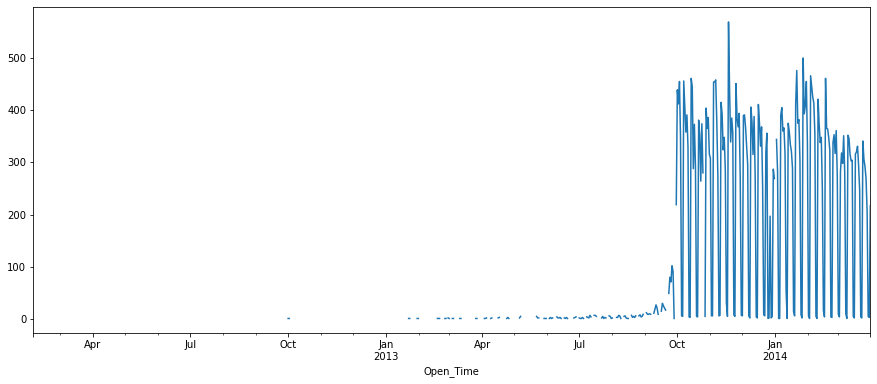

In [147]:
data2.plot(figsize=(15,6))
plt.show()

In [148]:
# Since not many tickets before October 2013, we consider only the latter values
data1_oct13=data2[data2.index>datetime(2013,10,1)]

In [149]:
data1_oct13

Open_Time
2013-10-02    412.0
2013-10-03    455.0
2013-10-04    345.0
2013-10-05      6.0
2013-10-06      5.0
              ...  
2014-03-27    269.0
2014-03-28    205.0
2014-03-29      5.0
2014-03-30      3.0
2014-03-31    217.0
Freq: D, Name: No_Incidents, Length: 181, dtype: float64

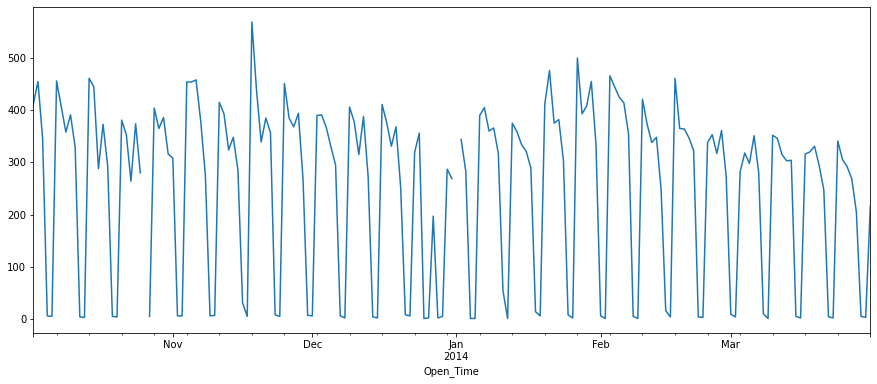

In [150]:
data1_oct13.plot(figsize=(15,6))
plt.show()

In [152]:
#for ARIMA we don't need to convert it into stationary wave
train=data1_oct13[:11000] 
test=data1_oct13[11000:]

In [153]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [154]:
##Model object creation and fitting the model
import warnings
warnings.filterwarnings('ignore')
model_arima = ARIMA(train, order=(3,1,3))#order= p,d,q (Randomly giving values for p,d,q)

#p - autoregressive model
#d - how many times differencing is done (integrated order)
#q - moving average model

model_arima_fit = model_arima.fit()#training

In [155]:
## evaluate the model
print(model_arima_fit.aic) # Akaike Information Criteria whichever value will give less aic value
#that value will be considered as optimal value

2234.238074261423


In [156]:
# forecast() - forecasts data at a specific future point in time
# predict() - refers to future data in general
forecasting_9 = model_arima_fit.forecast(steps=9)# forecasting for next 9 months

# The result of the forecast() function is an array containing the forecast value, 
# the standard error of the forecast, and the confidence interval information.
# we are only interested in the first element of this forecast.. so index 0 to take 1st value.

In [157]:
forecasting_9

2014-04-01    167.913845
2014-04-02     81.774363
2014-04-03    260.500738
2014-04-04    323.714472
2014-04-05    152.055134
2014-04-06    187.114312
2014-04-07    356.676716
2014-04-08    254.541084
2014-04-09    135.709911
Freq: D, Name: predicted_mean, dtype: float64

In [61]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q=range(0,4) #values of p,d,q (range can be from 0 to 5 for large datasets)

pdq = list(itertools.product(p,d,q))# is used to find the cartesian product from the given iterator,
pdq  #list of all possible combinations of p,d,q

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [75]:
import warnings
warnings.filterwarnings('ignore')
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:#iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)
          
              #printing parameter and aic values
    except:
        continue
#take lowest aic score        

(0, 0, 0) 122961.77777927293
(0, 0, 1) 113011.71113866658
(0, 0, 2) 108568.52272783444
(0, 0, 3) 105682.09572199792
(0, 1, 0) 100461.47865279832
(0, 1, 1) 100059.38895982769
(0, 1, 2) 99788.79397491197
(0, 1, 3) 99729.0807339097
(0, 2, 0) 109724.62813213762
(0, 2, 1) 100464.69192832586
(0, 2, 2) 100063.15346558439
(0, 2, 3) 99793.05308842653
(0, 3, 0) 121946.29835100833
(0, 3, 1) 109727.05299728872
(0, 3, 2) 100557.05769500363
(0, 3, 3) 100113.81476341655
(1, 0, 0) 100113.95865478145
(1, 0, 1) 99851.10029272604
(1, 0, 2) 99665.55427894555
(1, 0, 3) 99636.96601385601
(1, 1, 0) 100172.23502953936
(1, 1, 1) 99297.44987742262
(1, 1, 2) 99286.51006747915
(1, 1, 3) 99274.9719385144
(1, 2, 0) 106252.02791399865
(1, 2, 1) 100175.83474342446
(1, 2, 2) 99306.4124420218
(1, 2, 3) 100057.935486011
(1, 3, 0) 115591.39427563157
(1, 3, 1) 106255.54265560185
(1, 3, 2) 100322.63853724321
(1, 3, 3) 100486.72883254639
(2, 0, 0) 99917.81106060372
(2, 0, 1) 99299.88540719356
(2, 0, 2) 99289.4738458553
(2, 

In [158]:
## create the final model with lowest aic score parameter
import warnings
warnings.filterwarnings('ignore')
model_arima = ARIMA(train, order=(3,1,3))

model_arima_fit = model_arima.fit()#training

In [159]:
forecast = model_arima_fit.forecast(steps=100)
forecast

2014-04-01    167.913845
2014-04-02     81.774363
2014-04-03    260.500738
2014-04-04    323.714472
2014-04-05    152.055134
                 ...    
2014-07-05    165.412400
2014-07-06    197.062279
2014-07-07    361.065423
2014-07-08    256.403189
2014-07-09    139.034851
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

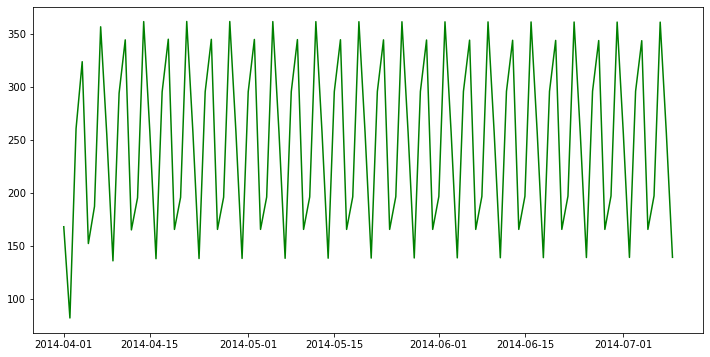

In [160]:
plt.figure(figsize=(12,6))
plt.plot(forecast,color='green')#line plot for prediction

# Business Case-3
### Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets

In [161]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Impact,Urgency,Priority,Category,Open_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,2741,11,57,137,0,4,4,4,1,2012-02-05,1,2,1
1,2863,1,57,70,1,3,3,3,1,2012-03-12,1,1,1
2,990,1,10,74,2,0,3,0,3,2012-03-29,1,0,1
3,2863,1,57,70,3,4,4,4,1,2012-07-17,1,0,1
4,2863,1,57,70,4,4,4,4,1,2012-08-10,1,0,1


In [163]:
# Selecting the predictors
x1 = data[['CI_Subcat','CI_Cat','WBS','Priority','Category','Urgency','Impact',
           'No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [166]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=3)

In [170]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x1_train=scale.fit_transform(x1_train)
x1_test=scale.transform(x1_test)

# Model Creation

### Decision Tree

In [173]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [174]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(x1_test)

In [175]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9992847947360892
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13973
           2       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         1

    accuracy                           1.00     13982
   macro avg       0.33      0.33      0.33     13982
weighted avg       1.00      1.00      1.00     13982



In [176]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[13972,     1,     0],
       [    8,     0,     0],
       [    1,     0,     0]], dtype=int64)

### Random Forest

In [178]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [179]:
# Predicting the model
y1_predict_rf = model1_rf.predict(x1_test)

In [180]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9993563152624804
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     13973
           2       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         1

    accuracy                           1.00     13982
   macro avg       0.33      0.33      0.33     13982
weighted avg       1.00      1.00      1.00     13982



In [181]:
confusion_matrix(y1_test,y1_predict_rf)

array([[13973,     0,     0],
       [    8,     0,     0],
       [    1,     0,     0]], dtype=int64)

# Report

## Analysis
The data is ordinal, nominal as well as categorical. To analyze the data, various data processing techniques like Label Encoding and Standardization is used.For training the data and predicting the target, algorithms used are Support Vector Machine, Decision Tree, Random Forest, Logistic Regression and XGBoost Classifier. Volume Forecasting is done with the help of Statsmodels & Matplotlib.

The analysis is done in three parts:

1. Predicting Priorities
2. Predicting Request for Change (RFC)
3. Forecasting the Incident Volume: The predictor variable is opening time.

## Summary

The project is done with the purpose of:

1. Finding out factors which affects priority and training a model which accurately predicts it so that preventive measures can be taken for High Priority Tickets and reassigning can be reduced.
2. Finding out factors which affect RFC and predicting it.
3. Forecasting Incident Volume in the future so that they can be better prepared with resources and technology planning.

## Results
For predicting Ticket Priority, Random Forest gives almost 99% accuracy. Predicting RFC accurately is not possible with this data as the missing value is more than 90% still we have imputed with the mode which is not best practise. And Volume Forecasting is visualized with the help of Matplotlib throughout the year.